Mass dashpot spring

In [1]:
# Free oscillations

using StructuralDynamicsODESolvers, Plots

k  = 2 ; m  = .5 ;  c = .1 ;
u0 = 1 ; v0 = 0 ;

M = m * ones(1, 1)
C = c * ones(1, 1)
K = k * ones(1, 1)
R = zeros(1)

sys = SecondOrderAffineContinuousSystem(M, C, K, R)

U₀ = u0 * ones(1)
V₀ = v0 * ones(1)

ivp_free = InitialValueProblem(sys, (U₀, V₀))

alg = Bathe(Δt = 0.1)
sol = solve(ivp_free, alg, NSTEPS=100)

StructuralDynamicsODESolvers.Solution{Bathe{Float64},Array{Array{Float64,1},1},Array{Array{Float64,1},1},Array{Array{Float64,1},1},StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}}(Bathe{Float64}(0.1), [[1.0], [0.9802906770648705], [0.9224030336109105], [0.8293671794657984], [0.7055362978076295], [0.5563892968508495], [0.38829306360315613], [0.20823446961244824], [0.023533268545647364], [-0.15845244241907191]  …  [0.2954339137690075], [0.3409456166365045], [0.3721464832796311], [0.3880911349237434], [0.3884530452429933], [0.3735251861177633], [0.34419628817969644], [0.3019041308579841], [0.2485681524619582], [0.18650443927489263]], [[0.0], [-0.3927685218007788], [-0.7623412847458226], [-1.0946357472180424], [-1.3773136156713797], [-1.600231873959693], [-1.7557985534709424], [-1.839221125267124], [-1.8486398588459747], [-1.785143168741996]  …  [0.5227965321110677], [0.38618852377346435], [0.23708016880284966], [0.08158417369084425], [-0.07405596128795366],

The following command is the same as `plot(times(sol), displacements(sol, 1))`.

In [2]:
plot(sol, vars=(0, 1))

# Forced oscillations

NSTEPS = 100
Δt = 0.1
ωf = k/(2m)
R = [[0.1 * sin(ωf * Δt * (i-1))] for i in 1:NSTEPS+1]

X = nothing # state constraints are ignored
B = ones(1, 1)
sys = SecondOrderConstrainedLinearControlContinuousSystem(M, C, K, B, X, R)

U₀ = u0 * ones(1)
V₀ = v0 * ones(1)

ivp_forced = InitialValueProblem(sys, (U₀, V₀))

alg = Bathe(Δt = 0.1)
sol = solve(ivp_forced, alg, NSTEPS=NSTEPS)

StructuralDynamicsODESolvers.Solution{Bathe{Float64},Array{Array{Float64,1},1},Array{Array{Float64,1},1},Array{Array{Float64,1},1},StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}}(Bathe{Float64}(0.1), [[1.0], [0.9803723702317345], [0.9229495772973079], [0.8311079697882691], [0.70948114620296], [0.56373924647023], [0.40033356600236597], [0.22621769680181544], [0.04855701404232558], [-0.12556155196254284]  …  [0.05191589815549042], [0.06649651313833717], [0.07732620403512559], [0.08441883203254875], [0.08795420028688099], [0.0882523531110619], [0.08574271154234249], [0.08092997963594557], [0.07435882618914089], [0.06657931279354262]], [[0.0], [-0.3908107028018044], [-0.7547112681189354], [-1.0781462818999081], [-1.3495630708548063], [-1.5598118080549135], [-1.7024380713035203], [-1.7738592637705741], [-1.7734212173564126], [-1.7033362194301382]  …  [0.16426846244750037], [0.12721389857654364], [0.08940505126540055], [0.0526113757454687], [0.018376520779349

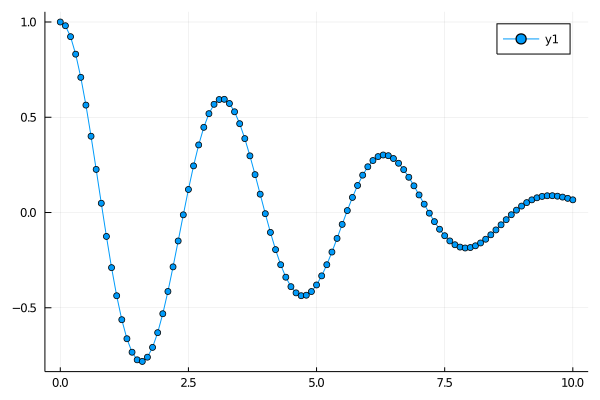

In [3]:
plot(sol, vars=(0, 1))